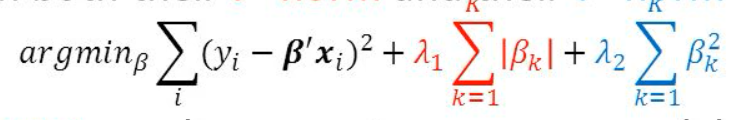

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV
import sklearn.metrics as mt

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
target[0:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

### with Ridge, Lasso and ElasticNet

In [6]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)
lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)
elastic_model = ElasticNet(alpha=0.1).fit(X_train, y_train)

In [7]:
print(f"Ridge Model Train Score: {ridge_model.score(X_train, y_train)}")
print(f"Lasso Model Train Score: {lasso_model.score(X_train, y_train)}")
print(f"ElasticNet Model Train Score: {elastic_model.score(X_train, y_train)}")

Ridge Model Train Score: 0.750827350977196
Lasso Model Train Score: 0.7382419735910873
ElasticNet Model Train Score: 0.7365251888690172


In [8]:
print(f"Ridge Model Test Score: {ridge_model.score(X_test, y_test)}")
print(f"Lasso Model Test Score: {lasso_model.score(X_test, y_test)}")
print(f"ElasticNet Test Score: {elastic_model.score(X_test, y_test)}")

Ridge Model Test Score: 0.6686244122021412
Lasso Model Test Score: 0.6569712802223936
ElasticNet Test Score: 0.666732830855557


In [9]:
ridge_predict = ridge_model.predict(X_test)
lasso_predict = lasso_model.predict(X_test)
elastic_predict = elastic_model.predict(X_test)

In [10]:
print(f"Ridge Model MSE: {mt.mean_squared_error(y_test, ridge_predict)}")
print(f"Lasso Model MSE: {mt.mean_squared_error(y_test, lasso_predict)}")
print(f"ElasticNet Model MSE: {mt.mean_squared_error(y_test, elastic_predict)}")

Ridge Model MSE: 24.301025500192747
Lasso Model MSE: 25.155593753934173
ElasticNet Model MSE: 24.439742316493255


### ElasticNet with CV

In [11]:
alpha = ElasticNetCV(cv=10, max_iter=10000).fit(X_train, y_train).alpha_
elactic_model2 =  ElasticNet(alpha=alpha).fit(X_train, y_train)
elastic_predict2 = elactic_model2.predict(X_test)

print(f"ElasticNet Model2 Train Score: {elactic_model2.score(X_train, y_train)}")
print(f"ElasticNet Model2 Test Score: {elactic_model2.score(X_test, y_test)}")
print(f"ElasticNet Model2 MSE: {mt.mean_squared_error(y_test, elastic_predict2)}")

ElasticNet Model2 Train Score: 0.6751044230261126
ElasticNet Model2 Test Score: 0.6651210319978071
ElasticNet Model2 MSE: 24.557941624425542
